In [15]:
import numpy as np
from scipy.stats import uniform
from scipy.stats import expon
from scipy.stats import norm
from scipy import special
import matplotlib.pyplot as plt

import sympy as sp
sp.init_printing()

# II.4 Variable Aleatoria Gaussiana y otras habituales

## Variable Aleatoria Uniforme

Denominamos **soporte de la variable aleatoria** a los valores de la misma en los que la función de densidad de probabilidad toma valores finitos distintos de cero. Considerando un intervalo de soporte $I = [a, b]$, se llama **variable aleatoria uniforme** a aquella en que todos los intervalos de igual longitud y totalmente contenidos en el intervalo de soporte sean **equiprobables**. La variable aleatoria uniforme tiene una función de densidad de probabilidad:

$$
U(a,b) \equiv f_X(x;a,b) =
\begin{cases}
    \frac{1}{b-a} & \quad \text{si } a\leq x \leq b\\
    0             & \quad \text{resto }
\end{cases}
$$

Y función de distribución de probabilidad:

$$
F_X(x;a,b) =
\begin{cases}
    0                   & \quad \text{si } x < a \\
    \frac{1}{b-a} (x-a) & \quad \text{si } a\leq x \leq b\\
    1                   & \quad \text{si } x > b
\end{cases}
$$

Calculando las integrales se obtienen fácilmente la media y la varianza:

* $\eta_X = E(X) = \int_{-\infty}^{\infty} xf_X(x;a,b)= \frac{1}{b-a}\int_a^bxdx=\frac{a+b}{2}$
* $E(X^2)= \int_{-\infty}^{\infty} x^2f_X(x;a,b)= \frac{1}{b-a}\int_a^bx^2dx=\frac{b^3-a^3}{3(b-a)}= \frac{a^2+ab+b^2}{3}$
* $\sigma_X^2 = Var(X) = E((X-\eta_X)^2) = E(X^2)-\eta_X^2=\frac{(b-a)^2}{12}$

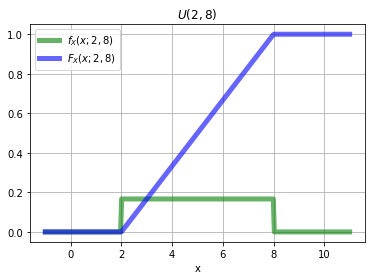

In [14]:
x = np.linspace(-1, 11, 300)
fig, ax = plt.subplots(1, 1)
#fig.set_size_inches(12,4)

ax.plot(x, uniform.pdf(x, loc=2, scale=6),'g-', lw=5, alpha=0.6, label=r'$f_X(x;2,8)$')
ax.plot(x, uniform.cdf(x, loc=2, scale=6),'b-', lw=5, alpha=0.6, label=r'$F_X(x;2,8)$')

ax.legend(loc='best', frameon=True), 
ax.grid()
ax.set_title(r'$U(2,8)$')
ax.set_xlabel('x')

plt.show()

### Funciones Condicionadas

Consideremos el caso ya visto en que el suceso condicionante $A$ podemos definirlo con intervalos de la variable aleatoria. Suponiendo que $A=\{a \leq x_1\leq X \leq x_2 \leq b\}$. Adviértase que si $x_1 < a$ ó si $x_2>b$, al extenderse el suceso condicionante fuera del soporte de la distribución, $A$ podría escribirse de forma equivalente con $x_1=a$ ó $x_2=b$, respectivamente.

$$\begin{align*}
F_X(x\, /\, \{x_1\leq X \leq x_2\}) & = \frac{P(\{X \leq x \}\bigcap \{x_1\leq X \leq x_2\ )\} }{P(\{x_1\leq X \leq x_2\})}=\\
 & = \begin{cases}
    0       & \quad x < x_1\\
    \frac{F_X(x)-F_X(x_1^-)}{F_X(x_2)-F_X(x_1^-)}  & \quad x_1 \leq x \leq x_2\\
    1 &\quad x > x_2
  \end{cases}
\end{align*}$$

$$\begin{align*}
f_X(x\, /\, \{x_1\leq X \leq x_2\}) = \begin{cases}
    0       & \quad x < x_1\\
    \frac{f_X(x)}{F_X(x_2)-F_X(x_1^-)}  & \quad x_1 \leq x \leq x_2\\
    0 &\quad x > x_2
  \end{cases}
\end{align*}$$

Sustituyendo para el caso concreto de la distribución uniforme, es fácil obtener:

$$
f_X(x/A) =
\begin{cases}
    \frac{1}{x_2-x_1} & \quad \text{si } x_1\leq x \leq x_2\\
    0             & \quad \text{resto }
\end{cases}
$$

$$
F_X(x/A) =
\begin{cases}
    0                   & \quad \text{si } x < x_1 \\
    \frac{1}{x_2-x_1} (x-x_1) & \quad \text{si } x_1\leq x \leq x_2\\
    1                   & \quad \text{si } x > x_2
\end{cases}
$$


### Ejemplo

Considérese que un suceso acontece con certeza en un intervalo, pero de forma totalmente aleatoria dentro del mismo. Piénsese, por ejemplo, en la llamada de una persona concreta que siempre se recibe diariamente entre 22h y 23h.

Se pide:

1. Modelar la VA $X$ que representa el momento de recibir la llamada, obteniendo tanto la fdp como la FDP
2. Calcular la media y la varianza
3. Calcular la probabilidad de recibir la llamada entre las 22h y las 22h:15m
4. Calcular la probabilidad de recibir la llamada justo a las 22h:15m
5. Si hasta las 22h:15m no se ha recibido la llamada, ¿cuál será la probabilidad de recibirla entre las 22hh:45m y las 23h?

## Variable Aleatoria Exponencial

**La variable aleatoria exponencial modela el tiempo o espacio entre el acontecimiento de dos sucesos sucesivos en un Proceso Puntual de Poisson**. Tiene la siguiente función de densidad de probabilidad:

$$
exp(\lambda) \equiv f_X(x;\lambda) = \lambda e^{-\lambda x} u(x) =
\begin{cases}
    0             & \quad x<0\\
    \lambda e^{-\lambda x} & \quad x \geq 0
\end{cases} = \lambda e^{-\lambda x} u(x)
$$

Donde $u(x)$ es la **función escalón**. La función de distribución de probabilidad es:

$$
F_X(x;\lambda) = (1-e^{-\lambda x})u(x) = 
\begin{cases}
    0                   & \quad \text{si } x < 0 \\
    1-e^{-\lambda x} & \quad \text{si } x \geq 0
\end{cases}= \left(1-e^{-\lambda x}\right)u(x)
$$

$\lambda > 0$ se denomina **tasa**, si bien a veces se utiliza la **escala** $\beta = \lambda^{-1}$.

Calculando las integrales por partes se obtienen la media y la varianza:

* $\eta_X = E(X) = \int_{-\infty}^{\infty} xf_X(x;\lambda)= \lambda \int_0^\infty xe^{-\lambda u}du=\frac{1}{\lambda}=\beta$
* $E(X^2)= \int_{-\infty}^{\infty} x^2f_X(x;\lambda)= \lambda \int_0^\infty x^2e^{-\lambda u}du=\frac{2}{\lambda^2}=2\beta^2$
* $\sigma_X^2 = Var(X) = E((X-\eta_X)^2) = E(X^2)-\eta_X^2=\frac{1}{\lambda^2}=\beta^2$

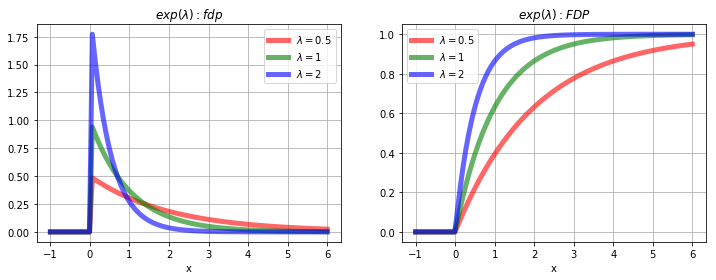

In [22]:
x = np.linspace(-1, 6, 100)
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12,4)
ax[0].plot(x, expon.pdf(x,scale=2),'r-', lw=5, alpha=0.6, label=r'$\lambda=0.5$')
ax[0].plot(x, expon.pdf(x,scale=1),'g-', lw=5, alpha=0.6, label=r'$\lambda=1$')
ax[0].plot(x, expon.pdf(x,scale=0.5),'b-', lw=5, alpha=0.6, label=r'$\lambda=2$')
ax[0].legend(loc='best', frameon=True), 
ax[0].grid()
ax[0].set_title(r'$exp(\lambda): fdp$')
ax[0].set_xlabel('x')

ax[1].plot(x, expon.cdf(x,scale=2),'r-', lw=5, alpha=0.6, label=r'$\lambda=0.5$')
ax[1].plot(x, expon.cdf(x,scale=1),'g-', lw=5, alpha=0.6, label=r'$\lambda=1$')
ax[1].plot(x, expon.cdf(x,scale=0.5),'b-', lw=5, alpha=0.6, label=r'$\lambda=2$')
ax[1].legend(loc='best', frameon=True), 
ax[1].grid()
ax[1].set_title(r'$exp(\lambda): FDP$')
ax[1].set_xlabel('x')
plt.show()

### Funciones condicionadas y propiedad sin memoria

Considérese el suceso condicionante $A=\{X>x_1\}$. Las probabilidades condicionadas se obtienen haciendo $x_2=\infty$ en las ecuaciones ya vistas:

$$
F_X(x/X>x_1) = \frac{F_X(x)-F_X(x_1)}{1-F_X(x_1)}u(x-x_1)
$$

$$
f_X(x/X>x_1) = \frac{f_X(x)}{1-F_X(x_1)}u(x-x_1)
$$

Sustituyendo las expresiones correspondientes a la distribución exponencial, resulta:

$$
F_X(x/X>x_1) = \left( 1-e^{-\lambda (x-x_1)}\right)u(x-x_1) = F_X(x-x_1)
$$

$$
f_X(x/X>x_1) = e^{-\lambda (x-x_1)}u(x-x_1) = f_X(x-x_1)
$$

Como puede verse, **la distribución exponencial no tiene memoria**, esto es, transcurrido un lapso $x_1$ desde el último suceso la distribución se comporta como si acabara de ocurrir, desplazándose hasta $x_1$.

### Ejemplo

Considérese que un servidor informático recibe peticiones independientes de clientes con una tasa de llegada $\lambda = 2$ cada segundo. La llegada de peticiones a lo largo del tiempo puede modelarse como un Proceso Puntual de Poisson por ser las llegadas independientes. 

* Si acaba de recibirse una petición, ¿cuál será la probabilidad de recibir otra en el próximo medio segundo?
* ¿Y cuál será la probabilidad de no recibir otra hasta dentro de un segundo?
* Tras la última llegada de una petición, extrañamente no ha entrado ninguna durante diez segundos. ¿Cuál será la probabilidad de que lo haga en el medio segundo siguiente?

## La Variable Aleatoria Gaussiana

### Distribución Normal Estándar

Consideremos la función $\varphi(x)$, definida como sigue:

$$\varphi_X(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}x^2}$$

Puede advertirse que se trata de una función de densidad de probabilidad, pues:

$$\varphi(x) >0 \quad \forall x \in \mathbb{R}\\
\int_{-\infty}^\infty \varphi(x)dx = 1$$

Analicemos la función $\varphi_X(x)$, que denominamos **Normal Estándar**:

* Es una función par pues $\varphi_X(x) = \varphi_X(-x)$
* $\varphi'_X(x) = -x\varphi_X(x) \implies \varphi'_X(0) = 0$
* $\varphi''_X(x) = (x^2-1)\varphi_X(x) \implies \varphi''_X(-1) = \varphi''_X(1) = 0$
* Máximo: $\varphi_X(0) = \frac{1}{\sqrt{2\pi}}\approx 0.399$. Puntos de inflexión: $\varphi_X(-1) = \varphi_X(1) =\frac{1}{\sqrt{2\pi e}}\approx 0.242$

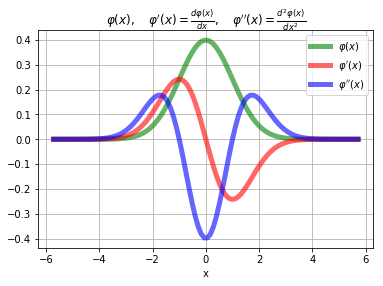

In [40]:
x = np.linspace(norm.ppf(0.0001,loc=-2), norm.ppf(0.9999,loc=2), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, norm.pdf(x),'g-', lw=5, alpha=0.6, label=r'$\varphi(x)$')
ax.plot(x, -x*norm.pdf(x),'r-', lw=5, alpha=0.6, label=r'$\varphi^{\prime}(x)$')
ax.plot(x, (x**2-1)*norm.pdf(x),'b-', lw=5, alpha=0.6, label=r'$\varphi^{\prime \prime}(x)$')
ax.legend(loc='best', frameon=True), 
ax.grid()
ax.set_title(r'$\varphi(x), \quad \varphi^\prime(x)=\frac{d\varphi(x)}{dx}, \quad \varphi^{\prime \prime}(x) = \frac{d^2\varphi(x)}{dx^2}$')
ax.set_xlabel('x')
plt.show()

La **función de distribución normal estándar** es:

$$\Phi(x) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^x  e^{-\frac{u^2}{2}} du = 
\frac{1}{2} + \frac{1}{\sqrt{2\pi}} \int_{0}^x  e^{-\frac{u^2}{2}} du
$$

En *Teoría de la Comunicación* suele utilizarse la función $Q(x)$, que es el complemento a 1 de $\Phi(x)$:

$$Q(x) = 1-\Phi(x) = \frac{1}{\sqrt{2\pi}} \int_x^{\infty}  e^{-\frac{u^2}{2}} du$$

En ingeniería y ciencias es habitual utilizar la **función error**, $erf(x)$:

$$erf(x) = \frac{2}{\sqrt{\pi}}\int_0^x e^{-u^2}du = \frac{1}{\sqrt{\pi}}\int_{-x}^x e^{-u^2}du= \frac{1}{\sqrt{2\pi}}\int_{-\sqrt{2}x}^{\sqrt{2}x} e^{-\frac{u^2}{2}}du$$

que satisface: 

* Función impar: $erf(x)=-erf(-x)$
* $erf(\infty)=1$
* $erf(1) \approx 0.8427$

Su complemento a 1 es la **función error complementaria**:

$$erfc(x) = 1-erf(x) = \frac{2}{\sqrt{\pi}}\int_x^\infty e^{-u^2} du = \frac{2}{\sqrt{2\pi}}\int_{\sqrt{2}x}^\infty e^{-\frac{u^2}{2}}du$$


Pueden encontrarse fácilmente relaciones entre las funciones anteriores:

$$\Phi(x) = \frac{1}{2}\left[1 + \frac{2}{\sqrt{2\pi}} \int_{0}^x  e^{-\frac{u^2}{2}}du \right] = \frac{1}{2}\left[1 + erf(\frac{x}{\sqrt{2}}) \right]$$

$$Q(x) = 1 - \Phi(x) = \frac{1}{2}\left[1 - erf(\frac{x}{\sqrt{2}}) \right] = \frac{1}{2}erfc(\frac{x}{\sqrt{2}})$$

Y puede calcularse la probabilidad de los intervalos:

$$P(x_1<X\leq x_2) = \Phi(x_2)-\Phi(x_1) = \frac{1}{2}erf(\frac{x_2}{\sqrt{2}}) - \frac{1}{2}erf(\frac{x_1}{\sqrt{2}})$$

En el caso que el intervalo esté centrado en el origen $x_1 = -x_2$:

$$P(-x_2<X\leq x_2) = \Phi(x_2)-\Phi(x_1) = erf(\frac{x_2}{\sqrt{2}})$$

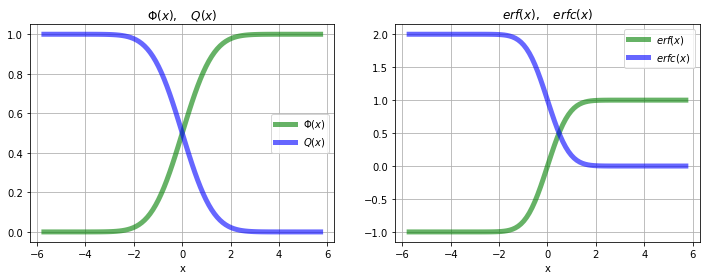

In [74]:
x = np.linspace(norm.ppf(0.0001,loc=-2), norm.ppf(0.9999,loc=2), 100)
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12,4)

ax[0].plot(x, norm.cdf(x),'g-', lw=5, alpha=0.6, label=r'$\Phi(x)$')
ax[0].plot(x, 1-norm.cdf(x),'b-', lw=5, alpha=0.6, label=r'$Q(x)$')

#ax[0].plot(x, special.erf(x),'r-', lw=5, alpha=0.6, label=r'$erf(x)$')
#ax[0].plot(x, special.erfc(x),'y-', lw=5, alpha=0.6, label=r'$erfc(x)$')

ax[0].legend(loc='best', frameon=True), 
ax[0].grid()
ax[0].set_title(r'$\Phi(x), \quad Q(x)$')
ax[0].set_xlabel('x')

ax[1].plot(x, special.erf(x),'g-', lw=5, alpha=0.6, label=r'$erf(x)$')
ax[1].plot(x, special.erfc(x),'b-', lw=5, alpha=0.6, label=r'$erfc(x)$')
ax[1].legend(loc='best', frameon=True), 
ax[1].grid()
ax[1].set_title(r'$erf(x), \quad erfc(x)$')
ax[1].set_xlabel('x')
plt.show()

Puede calcularse fácilmente la concentración de masa de probabilidad en torno al origen:

* $P(|X|\leq 1) = erf(\frac{1}{\sqrt2}) \approx 0.682689492137086$
* $P(|X|\leq 2) = erf(\frac{2}{\sqrt2}) \approx 0.954499736103642$
* $P(|X|\leq 3) = erf(\frac{3}{\sqrt2}) \approx 0.997300203936740$

Adviértase, que al ser la fdp normal estándar una función par, $\varphi(x) = \varphi(-x)$, la esperanza matemática resulta nula. El cálculo de la varianza requiere calcular la integral, y es igual a 1:

* $\eta_X=E(X) = \int_\infty^\infty x\varphi(x) dx = 0$
* $E(X^2) = \int_\infty^\infty x^2\varphi(x) dx = 1$
* $\sigma_X^2=Var(X) = E(X^2) - E^2(X) = 1 \implies \sigma_X = 1$

Por tanto, las concentraciones de masa de probabilidad anteriores están calculadas a una, dos y tres $\sigma$ de la media, respectivamente.

### Distribución Gaussiana o Normal

Si la variable aleatoria $X$ tiene una distribución Normal Estándar $\varphi(x)$ (media nula y varianza unidad), podemos generar una nueva variable aleatoria con media $\eta_Y$ y varianza $\sigma_Y^2$ sin más que aplicar la transformación lineal:

$$Y = \sigma_Y X + \eta_Y$$

Puede demostrarse que la variable aleatoria $Y$ tiene la siguiente distribución:

$$F_Y(y)= \Phi(\frac{y-\eta_Y}{\sigma_Y})$$

$$f_Y(y) =\frac{dF_Y(y)}{dy} = \frac{1}{\sigma_Y}\varphi(\frac{y}{\sigma_Y})$$

Intentemos ganar cierta intuición trabajando con estas transformaciones de la función de densidad Normal Estándar. Adviértase que, en lo sucesivo, tras los cambios de variable volvemos a llamar a la variable $X$. Aunque al principio puede resultar confuso, es habitual trabajar así para tener las funciones de interés con $x$ de variable independiente.

La función $\varphi(x)$ puede desplazarse en el eje real, y seguirá siendo una función de densidad de probabilidad:

$$\varphi(x-\eta_X)=\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}(x-\eta_X)^2}$$

Sin embargo, si le aplicamos un cambio de escala $\varphi(\frac{x}{\sigma_X})$ puede advertirse que el área bajo la curva es $\sigma_X$. Por ello, es necesario normalizar por el área resultante tras el cambio de escala, para seguir teniendo una función de densidad de probabilidad:
$$\frac{1}{\sigma_X}\varphi(\frac{x}{\sigma_X})$$

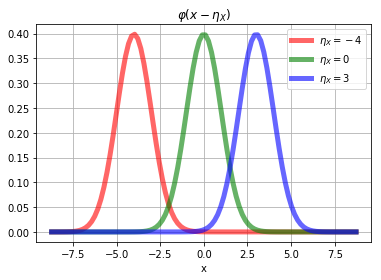

In [14]:
x = np.linspace(norm.ppf(0.0001,loc=-5), norm.ppf(0.9999,loc=5), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, norm.pdf(x,loc=-4),'r-', lw=5, alpha=0.6, label=r'$\eta_X=-4$')
ax.plot(x, norm.pdf(x),'g-', lw=5, alpha=0.6, label=r'$\eta_X=0$')
ax.plot(x, norm.pdf(x,loc=3),'b-', lw=5, alpha=0.6, label=r'$\eta_X=3$')
ax.legend(loc='best', frameon=True), 
ax.grid()
ax.set_title(r'$\varphi(x-\eta_X)$')
ax.set_xlabel('x')
plt.show()

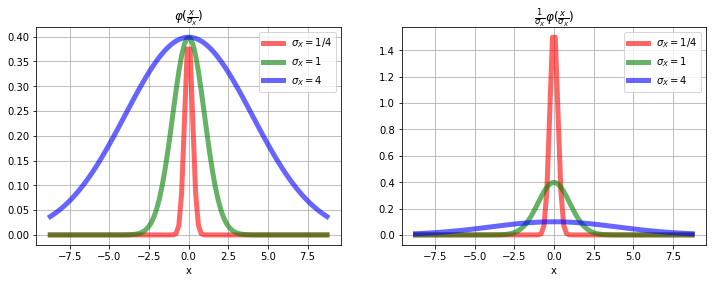

In [21]:
x = np.linspace(norm.ppf(0.0001,loc=-5), norm.ppf(0.9999,loc=5), 100)
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12,4)
ax[0].plot(x, (1/4)*norm.pdf(x,scale=1/4),'r-', lw=5, alpha=0.6, label=r'$\sigma_X=1/4$')
ax[0].plot(x, norm.pdf(x),'g-', lw=5, alpha=0.6, label=r'$\sigma_X=1$')
ax[0].plot(x, 4*norm.pdf(x,scale=4),'b-', lw=5, alpha=0.6, label=r'$\sigma_X=4$')
ax[0].legend(loc='best', frameon=True), 
ax[0].grid()
ax[0].set_title(r'$\varphi(\frac{x}{\sigma_X})$')
ax[0].set_xlabel('x')

ax[1].plot(x, norm.pdf(x,scale=1/4),'r-', lw=5, alpha=0.6, label=r'$\sigma_X=1/4$')
ax[1].plot(x, norm.pdf(x),'g-', lw=5, alpha=0.6, label=r'$\sigma_X=1$')
ax[1].plot(x, norm.pdf(x,scale=4),'b-', lw=5, alpha=0.6, label=r'$\sigma_X=4$')
ax[1].legend(loc='best', frameon=True), 
ax[1].grid()
ax[1].set_title(r'$\frac{1}{\sigma_X}\varphi(\frac{x}{\sigma_X})$')
ax[1].set_xlabel('x')
plt.show()

Se define la distribución normal de parámetros $\eta_X$ y $\sigma_X$ a la distribución de probabilidad con la siguiente función de densidad:

$$N(\eta_X, \sigma_X)\equiv f_X(x;\eta_X, \sigma_X) = \frac{1}{\sigma_X}\varphi(\frac{x-\eta_X}{\sigma_X})= \frac{1}{\sqrt{2\pi}\sigma_X}e^{-\frac{(x-\eta_X)^2}{2\sigma_X^2}}$$

Como se ha visto, $E(X)=\eta_X$ y $Var(X)=\sigma_X^2$.

La función de distribución de probabilidad es:

$$
\begin{align*}
G(\eta_X, \sigma_X)&\equiv F_X(x; \eta_X, \sigma_X) = \Phi(\frac{x-\eta_X}{\sigma_X}) = \frac{1}{\sqrt{2\pi}\sigma_X}\int_{-\infty}^x  e^{-\frac{(u-\eta_X)^2}{2\sigma_X^2}} du=\\
&= \frac{1}{\sqrt{2\pi}\sigma_X}\int_{-\infty}^{\frac{x-\eta_X}{\sigma_X}}  e^{\frac{u^2}{2}} du= \frac{1}{2}\left[1 + erf(\frac{x-\eta_X}{\sigma_X\sqrt{2}}) \right]
\end{align*}
$$

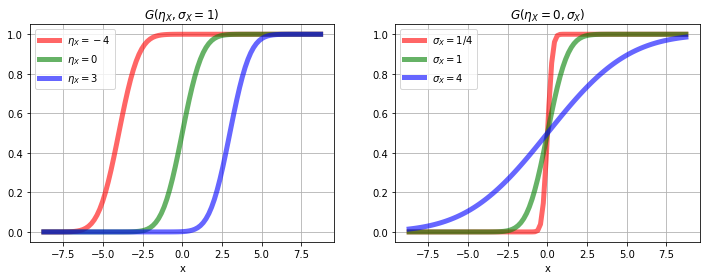

In [25]:
x = np.linspace(norm.ppf(0.0001,loc=-5), norm.ppf(0.9999,loc=5), 100)
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12,4)
ax[0].plot(x, norm.cdf(x,loc=-4),'r-', lw=5, alpha=0.6, label=r'$\eta_X=-4$')
ax[0].plot(x, norm.cdf(x),'g-', lw=5, alpha=0.6, label=r'$\eta_X=0$')
ax[0].plot(x, norm.cdf(x,loc=3),'b-', lw=5, alpha=0.6, label=r'$\eta_X=3$')
ax[0].legend(loc='best', frameon=True), 
ax[0].grid()
ax[0].set_title(r'$G(\eta_X,\sigma_X=1)$')
ax[0].set_xlabel('x')

ax[1].plot(x, norm.cdf(x,scale=1/4),'r-', lw=5, alpha=0.6, label=r'$\sigma_X=1/4$')
ax[1].plot(x, norm.cdf(x),'g-', lw=5, alpha=0.6, label=r'$\sigma_X=1$')
ax[1].plot(x, norm.cdf(x,scale=4),'b-', lw=5, alpha=0.6, label=r'$\sigma_X=4$')
ax[1].legend(loc='best', frameon=True), 
ax[1].grid()
ax[1].set_title(r'$G(\eta_X=0,\sigma_X)$')
ax[1].set_xlabel('x')
plt.show()

### Propiedades asintóticas

#### Aproximación de la Distribución Binomial

Conforme al **Teorema de Moivre-Laplace** la distribución Binomial $B(n,p)$ puede aproximarse por la distribución Normal $N(np, \sqrt(np(1-p)))$ cuando $n$ es grande y $p$ no está cerca de $0$ ni de $1$. El Teorema prueba la convergencia en el límite. En la práctica, se adopta la aproximación cuando $n >20$ y $p \approx 0.5$. Cuanto mayor sea $n$ más puede apartarse $p$ del valor $0.5$, aunque nunca debe aproximarse a $0$ ni $1$.

$$B(n,p) \approx N(np, \sqrt(np(1-p)))$$

#### Aproximación de la Distribución de Poisson

La distribución de Poisson $Pois(\lambda)$ puede aproximarse por la distribución Normal $N(\lambda, \lambda)$ cuando $\lambda$ es grande

$$Pois(\lambda) \approx N(\lambda, \lambda)$$

### Función de densidad condicionada

Consideremos ahora el suceso condicionante $A=\{x_1<X\leq x_2\}$. 

$$\begin{align*}
F_X(x\, /\, \{x_1 < X \leq x_2\}) & = 
\begin{cases}
    0       & \quad x \leq x_1\\
    \frac{F_X(x)-F_X(x_1)}{F_X(x_2)-F_X(x_1)}  & \quad x_1 < x \leq x_2\\
    1 &\quad x > x_2
  \end{cases}
\end{align*}$$

$$\begin{align*}
f_X(x\, /\, \{x_1 < X \leq x_2\}) = \begin{cases}
    0       & \quad x \leq x_1\\
    \frac{f_X(x)}{F_X(x_2)-F_X(x_1)}  & \quad x_1 < x \leq x_2\\
    0 &\quad x > x_2
  \end{cases}
\end{align*}$$

Sustituyendo para la variable aleatoria Gaussiana:

$$F_X(x_2)-F_X(x_1)=
\frac{1}{2}erf(\frac{x_2-\eta_X}{\sigma_X\sqrt{2}}) - \frac{1}{2}erf(\frac{x_1-\eta_X}{\sigma_X\sqrt{2}})
$$

Si $x_1$ y $x_2$ son simétricos respectos de $\eta_X$:

$$F_X(x_2)-F_X(x_1)= erf(\frac{x_2-\eta_X}{\sigma_X\sqrt{2}})$$

Adviértase que, considerando este factor normalizante, podemos reutilizar las expresiones de la distribución total (no condicionada) para el cálculo de probabilidades en los subintervalos incluidos en el suceso condicionante $A$.

### Mezcla de Gaussianas

Es habitual en la práctica confrontar distribuciones multimodales. Con frecuencia se considera que estamos ante una superposición de distribuciones Gaussianas, una por cada una de las modas existentes, con sus respectivos valores medios y varianzas.

A veces conviene considerar que cada una de tales distribuciones representa una subpoblación, y que cada observación de la variable aleatoria proviene de una de ellas. Asociemos a cada subpoblación con una hipótesis $H_i$ de la que conocemos su probabilidad *a priori*, $P(H_i)$. Consideremos que también conocemos las verosimilitudes de las observaciones en relación a las subpoblaciones, que podemos modelar mediante las probabilidades condicionadas:

$$f_{X_i}(x/H_i) \equiv N(\eta_{X_i}, \sigma_{X_i})$$

Podemos utilizar el Teorema de la Probabilidad Total para obtener la fdp de la **mezcla de Gaussianas**:

$$f_X(x) = f_{X_1}(x/H_1)P(H_1)+ \ldots + f_{X_1}(x/H_1)P(H_1)$$


### Ejemplo

En una población, el $48\%$ de las personas son hombres y el resto mujeres. Las estaturas de cada subpoblación se modela con una distribución Gaussiana, de la siguiente manera. La estatura media de las mujeres es de 165 cm y su desviación típica de 8 cm, mientras que la estatura media de los hombres es de 175 cm y su desviación típica es de 10 cm.

* Calcule cuál es la probabilidad de que un hombre mida más de 2 m. Igualmente con una mujer
* Considere ahora subpoblaciones de baloncestistas. En la femenina todas las estaturas son superiores a 170 cm, mientras que en las masculinas son todas superiores a 180 cm. ¿Cuál es la probabilidad de que una jugadora mida más de 2 m? ¿Y un jugador?
* Suponga que tenemos una persona cuyo género desconocemos y que mide 170 cm. ¿Qué es más verosímil, que sea un hombre o una mujer?
* Obtenga utilizando el Teorema de la Probabilidad Total la mezcla de Gaussianas que modela la distribución total de hombres y mujeres
* Utilice el Teorema de Bayes para ver qué es más probable, que la persona de 170 cm sea un hombre o una mujer.
* ¿Cuál es la probabilidad de error si decide que es un hombre? ¿Y si decide que es una mujer?
* Elabore una regla de decisión que permita seleccionar el género por estatura minimizando el error. ¿Cuál será la probabilidad de error de esta regla?

# Canal Gaussiano

## Cálculos con SYMPY

In [76]:
# Define Standard Normal 
x, y=sp.symbols('x y')
expr = (1/(sp.sqrt(2*sp.pi)))*sp.exp(-x**2/2)
expr

In [44]:
# Es fdp
sp.integrate(expr,(x, -sp.oo, sp.oo))

In [10]:
# First derivative

sp.diff(expr,x)

In [12]:
sp.simplify(-x*expr-sp.diff(expr,x)) # Comprobación de igualdad

In [45]:
# Second derivative

sp.diff(expr,x,2)

In [53]:
# Valor del máximo

expr.subs(x,0).evalf()

In [56]:
# Valor del punto de inflexión

expr.subs(x,1).evalf()

In [9]:
print(sp.integrate(expr,(x, -sp.oo, y)))

sp.diff(expr,x)

0.398942280401433
erf(sqrt(2)*y/2)/2 + 1/2


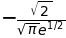

In [16]:
sp.diff(expr,x,3).subs(x,-1)

In [20]:
# Masa de probabilidad a 1, 2 y 3 sigmas calculada integrando

print(sp.integrate(expr,(x, -1, 1)).evalf())
print(sp.integrate(expr,(x, -2, 2)).evalf())
print(sp.integrate(expr,(x, -3, 3)).evalf())

0.682689492137086
0.954499736103642
0.997300203936740


In [71]:
# Masa de probabilidad a 1, 2 y 3 sigmas calculada con función error

print(special.erf(1/np.sqrt(2)))
print(special.erf(2/np.sqrt(2)))
print(special.erf(3/np.sqrt(2)))

special.erf(1)

0.6826894921370859
0.9544997361036416
0.9973002039367398


In [77]:
print(sp.integrate(x**2*expr,(x, -sp.oo, sp.oo)))

1


In [78]:
sp.integrate(x**2*expr)